<IPython.core.display.Javascript object>


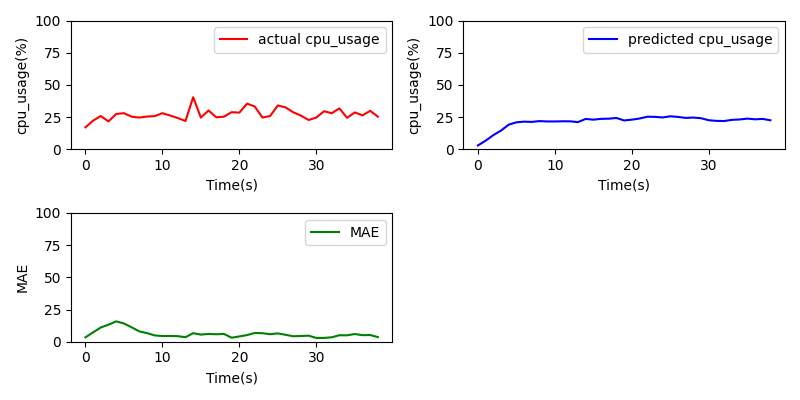

In [65]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from psutil import cpu_percent
import math
%matplotlib notebook



def sigmoid(a):
    return 1 / (1 + math.exp(-a));

# let we set inputs as
In0=0
In1=0
In2=0
In3=0
In4=0
#Normalization find the maximum value and minimum of the the inputs and then normalize aech input with N(InputA)= (InputA-Min(Inputs))/(Max(Inputs)-Min(Inputs))
# let in the current example values are percentages then max=100 and min=0 thus In0=(In0-0)/(100-0)=> In0=In0/100
# after we get outputs we will denormalize the output with the formula   OutputA= N(OutputA) * (Max(Inputs)-Min(Inputs))+Min(Inputs)
#In0=40/100
#In1=50/100
#In2=30/100
#In3=60/100
#In4=80/100

x0=In0 
x1=In1 
x2=In2 
x3=In3 
x4=In4
##############
frame_len=200
y=[]
z=[0,0,0,0,0]
x=[]
FCGP=[0,0,0,0,0]
ec = [0]
e = [0,0,0,0,0]
mae = []
fig=plt.figure(figsize=(8,4))
def animate(i):
    m=cpu_percent()
    y.append(m)
    z.append(m)
    #x0=z[-1]/100
    #x1=z[-2]/100
    #x2=z[-3]/100
    #x3=z[-4]/100
    #x4=z[-5]/100
    x0=z[-1]
    x1=z[-2]
    x2=z[-3]
    x3=z[-4]
    x4=z[-5]
    #p=(z[-1]+z[-2]+z[-3]+z[-4]+z[-5])/5
    #x.append(p)
    #ec.append(p)
    n5=sigmoid(x4*0.506582348 +x2*-0.541103631 +x1*0.959851767+x4*0.912161709+x3*0.997902529)
    n6=sigmoid(x4*-0.828627814 +n5*-0.599031165 +n5*0.896761378+x2*0.156051832+x3*-0.025218621)
    n7=sigmoid(x3*-0.999448609+x1*0.975382807+x0*-0.982697096+x1*0.979656103+x0*-0.970994118)
    n8=sigmoid(n7*(-0.539523242)+n6*0.491734746+n5*0.02705971+x4*0.143474725+x4*-0.601916252)
    n9=sigmoid(x0*-0.75989462+n8*0.048235005+x4*-0.097955664+x1*-0.873630507+n5*0.132408839)
    n10=sigmoid(x0*-0.994272874+n8*0.976679028+x3*-0.986520556+x0*-0.985976986+x0*-0.992489562)
    n11=sigmoid(x3*0.433099563+n9*0.848981216+x0*0.348491568+x1*0.53241466+	n7*-0.371502855)
    n12=sigmoid(n8*-0.652311893+n8*-0.236627174+n8*-0.525020231+n7*0.056080529+x0*-0.370064069)
    n13=sigmoid(n12*0.660042282+n10*0.995998154+x3*0.551665019+x1*-0.677119584+n5*-0.692222669)
    n14=sigmoid(x3*-0.998688241+x3*-0.978921784+n8*0.990034621+x3*-0.966987596+n8*0.998405675)
    n15=sigmoid(n8*-0.847024843+n13*-0.244673164+x0*-0.588255352+x2*0.647021878+x1*0.876332234)
    n16=sigmoid(x4*0.840663869+x0*-0.011851347+n9*-0.184688541+n14*-0.334850961+n15*0.517705818)
    n20=sigmoid(n15*-0.605733314+n15*-0.998158624+x3*0.999717273+n11*-0.92657599+n11*-0.98455636)
    n21= sigmoid(n13*0.430962424+n20*-0.998921473+	n9*0.034041672+n13*0.180002296+n16*0.703225416)
    o0=x4
    o1=n5
    o2=n5
    o3=x0
    o4=n5
    o5=n21
    #FCGP=(o0+o1+o2+o3+o4+o5)/6
    FCGP=(x1+x2+x3+x4+x0+o5)/6
    #x.append((FCGP[-1]+FCGP[-2]+FCGP[-3]+FCGP[-4]+FCGP[-5])/5)
    x.append(FCGP)
    ec.append(FCGP)
    e.append(abs(ec[-2]-y[-1]))
    mae.append((e[-1]+e[-2]+e[-3]+e[-4]+e[-5])/5)
    #mae.append((e[-1]-e[-2]
    if len(y) <= frame_len:
        plt.subplot(2,2,1)
        plt.cla()
        plt.plot(y, 'r', label='actual cpu_usage')
    else:
        plt.subplot(2,2,1)
        plt.cla()
        plt.plot(y[-frame_len:], 'r', label='actual cpu_usage')
    plt.xlabel('Time(s)')
    plt.ylabel('cpu_usage(%)')
    plt.legend(loc='upper right')
    plt.ylim(0,100)
    plt.tight_layout()
    if len(x) <= frame_len:
        plt.subplot(2,2,2)
        plt.cla()
        plt.plot(x, 'b', label='predicted cpu_usage')
    else:
        plt.subplot(2,2,2)
        plt.cla()
        plt.plot(x[-frame_len:], 'b', label='predicted cpu_usage')
    plt.subplot(2,2,2)
    plt.xlabel('Time(s)')
    plt.ylabel('cpu_usage(%)')
    plt.legend(loc='upper right')
    plt.ylim(0,100)
    plt.tight_layout()
    
    
    if len(mae) <= frame_len:
        plt.subplot(2,2,3)
        plt.cla()
        plt.plot(mae, 'g', label='MAE')
    else:
        plt.subplot(2,2,3)
        plt.cla()
        plt.plot(mae[-frame_len:], 'b', label='MAE')
    plt.subplot(2,2,3)
    plt.xlabel('Time(s)')
    plt.ylabel('MAE')
    plt.legend(loc='upper right')
    plt.ylim(0,100)
    plt.tight_layout()
    
ani = FuncAnimation(plt.gcf(), animate, interval = 1000)